# 1  자료소개

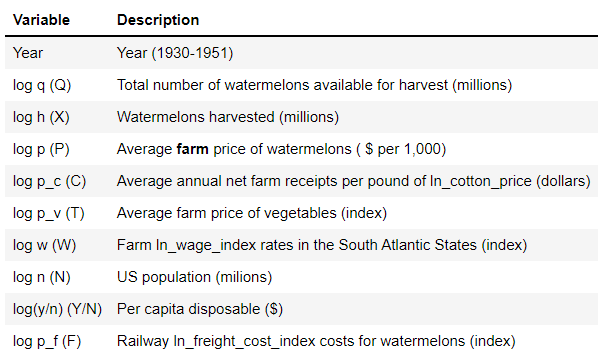

# 2  Data cleaning

## 2.1  자료 내려받기

In [2]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# 자료 내려받고 DataFrame으로 저장
watermelon_URL = "https://raw.githubusercontent.com/pfcvma/econ-python/main/doing-economics-excel-7-1-datafile.xlsx"
df_wm = pd.read_excel(watermelon_URL)

In [4]:
df_wm

,Year,log.q,log.h,log.p,log.pc,log.pv,log.w,log.n,log.y_n,log.pf
0,1930,1.932,1.902,2.068,0.976,0.367,1.462,2.090,2.781,1.101
1,1931,1.892,1.882,2.004,0.753,1.184,1.362,2.093,2.712,1.106
2,1932,1.826,1.761,1.897,0.814,1.124,1.230,2.096,2.591,1.129
3,1933,1.751,1.741,1.968,1.007,0.993,1.204,2.099,2.561,1.149
4,1934,1.779,1.778,2.017,1.092,0.641,1.267,2.102,2.614,1.140
5,1935,1.822,1.805,1.982,1.045,0.822,1.290,2.104,2.662,1.177
6,1936,1.796,1.793,2.107,1.092,0.824,1.301,2.108,2.713,1.174
7,1937,1.851,1.835,2.025,0.925,0.903,1.352,2.110,2.741,1.175
8,1938,1.850,1.825,2.037,0.934,1.322,1.342,2.113,2.704,1.196
9,1939,1.800,1.797,2.075,0.959,0.739,1.352,2.117,2.731,1.169


In [5]:
# 결측치 확인
print(np.count_nonzero(df_wm.isnull()))

2


### Missing value 처리방법과 장단점
(1) 결측값을 특정 값으로 채우기 (replace missing values with scalar value) : df.fillna(0)

(2) 결측값을 변수별 평균으로 대체하기(filling missing values with mean per columns)
      : df.fillna(df.mean())

> (1)의 경우 데이터의 평균치, 중앙값, 최빈값 등 자료의 통계분포 및 지표를 해칠 우려가 있으나,
> (2)의 경우 데이터 평균치 등 자료의 통계분포 및 지표를 해치지 않게 됨.
> 이번 자료는 로그값을 표현한 자료이므로 특정 값으로 채우는 방식은 적절하지 않을 것으로 사료됨. 따라서 (2)의 방식을 채택

이외에도 Scikit Learn의 SimpleImputer 함수를 이용해 결측치를 평균, 중앙값, 최빈값으로 대치할 수 있다. 결측치(np.nan)뿐만 아니라 파라미터 missing_values에 대치하고자 하는 값을 지정해서 값을 대치할 수도 있다. IterativeImputer를 활용한 다변량 대치 방법, Scikit learn의 KNNImputer 함수를 사용하는 방법도 있다. KNNImputer 방법은 평균, 중앙값, 최빈값으로 대치하는 경우보다 더 정확할 때가 많다. 반면 전체 데이터셋을 메모리에 올려야 해서 메모리가 많이 필요하고 이상치에 민감하다는 단점이 있다. 

In [6]:
# 결측치를 변수별 평균값으로 채우기
df_wm2 = df_wm.fillna(df_wm.mean())
df_wm2

,Year,log.q,log.h,log.p,log.pc,log.pv,log.w,log.n,log.y_n,log.pf
0,1930,1.932,1.902,2.068,0.976,0.367000,1.462000,2.090,2.781,1.101
1,1931,1.892,1.882,2.004,0.753,1.184000,1.362000,2.093,2.712,1.106
2,1932,1.826,1.761,1.897,0.814,1.124000,1.230000,2.096,2.591,1.129
3,1933,1.751,1.741,1.968,1.007,0.993000,1.204000,2.099,2.561,1.149
4,1934,1.779,1.778,2.017,1.092,0.641000,1.267000,2.102,2.614,1.140
5,1935,1.822,1.805,1.982,1.045,0.822000,1.290000,2.104,2.662,1.177
6,1936,1.796,1.793,2.107,1.092,0.824000,1.301000,2.108,2.713,1.174
7,1937,1.851,1.835,2.025,0.925,0.903000,1.352000,2.110,2.741,1.175
8,1938,1.850,1.825,2.037,0.934,1.322000,1.342000,2.113,2.704,1.196
9,1939,1.800,1.797,2.075,0.959,0.739000,1.352000,2.117,2.731,1.169


## 2.2  다중공선성

### 2.2.1  상관관계 pair-wise correlation

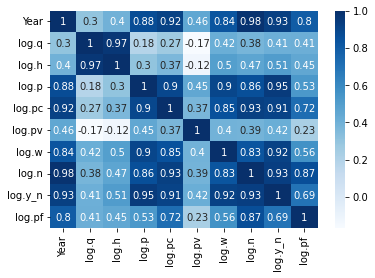

In [7]:
sns.heatmap(df_wm2.corr(), annot=True, cmap="Blues")

### 상관계수의 특징
heatmap을 이용하면 Target Feature와 나머지 독립변수들의 상관계수를 직관적으로 확인할 수 있다.변수와 변수 사이의 선형적 관계가 있는지를 한눈에 보기 위해 시각화하는 함수로, 독립변수간의 다중공선성 파악에도 용이하다. 

상관관계는 -1~1 사이에 값을 가지며 절대값이 0.8 이상이면 높은 선형 관계가 있다고 볼 수 있다.

위의 자료로 보았을 때, Year는 log.q, log.h, log.pv를 제외한 모든 log 수치들과 높은 선형 관계에 있으며, 각 log 수치들은 log.q, log.h, log.pv 제외 모두 서로 높은 선형 관계에 있다. log.pf는 Year, log.n과만 높은 선형 관계를 드러낸다.

+

heatmap은 각 변수사이의 관계를 보기위해 많이 다룬다. 이 때 유의할 점은 heatmap은 변수와 변수 사이의 선형적인 관계를 알기 위해 하는 것이지, 변수의 관계가 비선형적인 관계인지는 알 수 없다.

상관계수가 낮게 나왔다고 두 변수를 독립이라고 말할 수 없다. 또 높게 나왔다고 정말로 두 변수는 관계가 깊다고 할 수도 없다.

이렇듯, heatmap은 그저 한 인사이트를 가져가는 정도로 그려보는 것이지, 높게 나오거나 적게 나왔다고만 할게 아니라 그 변수들에 대한 고찰이 필요하다.

정말로 독립 등의 관계가 있는지는 회귀 분석을 통해야 알 수 있다. (이것도 복잡한 과정을 거쳐야 한다.)


### 2.2.2  variation inflation factor

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_wm2.values, i) for i in range(df_wm2.shape[1])]
vif["features"] = df_wm2.columns
vif

,VIF Factor,features
0,363138.489179,Year
1,20740.619893,log.q
2,19982.841824,log.h
3,3593.684289,log.p
4,252.490014,log.pc
5,17.662682,log.pv
6,388.469887,log.w
7,501550.137949,log.n
8,9378.377805,log.y_n
9,3542.051429,log.pf


### VIF

서로 상관관계가 있는 변수가 추가 되면(공선성) Variance가 증폭되어 회귀 계수가 커지는 특징이 있다.

따라서 공선성은 회귀 계수 추정치의 정확성을 낮추므로 계수에 대한 표준오차가 증가하게 되고 이는 계수의 t통계량을 줄인다. 결과적으로 공선성이 존재하면 귀무가설이 기각될 확률이 줄어든다. 

VIF는 Squared Standard Error Inflation로, VIF가 큰 변수를 제거 한 뒤, 남아있는 변수 각각의 VIF 변화를 확인하여 이전 보다 VIF값의 차이가 큰 변수가 있다면 앞서 제거한 변수와 상관성이 높은 변수라 할 수 있다. 반대로 변화가 없는 변수라면 앞서 제거한 변수와 상관성은 낮다 할 수 있다.

VIF의 가장 작은 값은 1이며 이때는 공선성이 전혀 없음을 나타낸다. 

경험적으로 VIF가 5이상 또는 10이상일 때 공선성이 있다 판단한다.

위의 자료는 모든 변수들의 VIF값이 10 이상으로(최소 17 ~ 최대 50만 이상), 모든 변수에 공선성이 존재한다.

+
공선성을 해결하는 간단한 방법은 첫째 문제가 되는 변수 하나를 제외하는 것과 공선성 변수를 단일 설명변수로 결합하는 법이 있다. 이 경우 두 변수 같에 스튜던트화 평균을 취해 outcome을 측정하는 새로운 변수를 만들게 된다.

# 3  공급곡선 추정

## *3.1*  Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

In [39]:
## checking the stationarity of a series using the ADF(Augmented Dickey-Fuller) Test
# -- Null Hypothesis: H0: p = 1 // The series has a unit root.(not stationary.)
# -- Alternate Hypothesis: H1: |p| < 1 // The series has no unit root.(stationary.)

def ADF(data, col):
 
    result = adfuller(data, autolag="AIC")
 
    print("---- Results of Augmented Dickey-Fuller Test of {} ----".format(col))
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if abs(result[1]) < 1 :
      print('The series {} has no unit root.(stationary.)'.format(col))
    elif result[1] == 1 :
      print('The series {} has a unit root.(not stationary.)'.format(col))

    print('----------------------------------------------------------')
 
col_names = list(df_wm2.columns.values)
for i in range(len(col_names)):
  ADF(df_wm2.iloc[:, i], col_names[i])


---- Results of Augmented Dickey-Fuller Test of Year ----
ADF Statistic: -0.191127
p-value: 0.9395710207
Lag: 1
observation: 20
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651
The series Year has no unit root.(stationary.)
----------------------------------------------------------
---- Results of Augmented Dickey-Fuller Test of log.q ----
ADF Statistic: 1.491463
p-value: 0.9974924935
Lag: 9
observation: 12
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
The series log.q has no unit root.(stationary.)
----------------------------------------------------------
---- Results of Augmented Dickey-Fuller Test of log.h ----
ADF Statistic: 0.383528
p-value: 0.9808683905
Lag: 9
observation: 12
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
The series log.h has no unit root.(stationary.)
----------------------------------------------------------
---- Results of Augmented Dickey-Fuller Test of log.p ----
ADF Statistic: -9.581302
p-value: 0.0000000000
Lag: 9
observation: 12
Criti

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


## 3.2  회귀식 유도

### 3.2.1  공급함수와 역공급함수

공급함수
Qs = f(Px, 임금, ...) -> Qs는 공급량
 
Qs = ~P -> P = ~Q 이것이 역공급함수

가로, 세로축을 P <-> Q 서로 바꿔준 것으로, P의 절편 이동량 등이 발생할 때 시각적으로 더 눈에 잘 들어오게 할 수 있어 P로 공급함수 식을 정리한 역공급함수를 사용한다.
P에 영향을 미치는 변수가 많아 그에 따른 P의 값을 보여주기 위해서 역공급함수를 사용하기도 한다. 기본적으로는 가격의 변화에 따른 공급량을 파악하고자 하므로 공급함수를 사용하게 되므로, 각 용도에 따라 장단이 있다고 볼 수 있다.

### 3.2.2  변수 선택

In [51]:
# 임금 야채가격
df_wm3 = df_wm2[['log.w', 'log.pv']]
df_wm3.head()

,log.w,log.pv
0,1.462,0.367
1,1.362,1.184
2,1.230,1.124
3,1.204,0.993
4,1.267,0.641


In [52]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_wm3.values, i) for i in range(df_wm3.shape[1])]
vif["features"] = df_wm3.columns
vif

,VIF Factor,features
0,12.935147,log.w
1,12.935147,log.pv


vif 값이 15 이내로 안정적으로 도출되며, 수박 재배량에 직접적 영향을 미칠 것으로 사료되는 임금과 야채가격을 변수로 선택하였다.

### 3.2.3  시점 선택

적응적 기대가설이란 과거의 경험을 바탕으로 미래에 대한 기대를 형성한다고 보는 가설
이다. 앞에서 우리는 거시경제의 단기균형이 기대의 조정을 통하여 장기균형으로 조정되어
갈 때 다음 기의 물가수준에 대한 기댓값이 이번 기의 물가수준이라고 가정한 바 있다. 즉,
이미 실현된 이번 기의 물가수준을 이용하여 미래의 물가수준을 예측한 것이다. 이와 같이
먼 과거로부터 지금까지 실현된 경제 변수의 값과 현상을 이용하여 기대를 형성하는 것이
적응적 기대이다. 

적응적 기대에 따라 기대가 형성되면 피할 수 있는 오차 곧 체계적인 오차가 존재한다. 그리고 피할 수 있는 오차가 존재하지 않는 기대형성방법이 합리적 기대이다.
즉, 기대를 형성하는 식이 일정하게 주어지면 항상 체계적인 오차가 나타날 가능성이
존재한다. 다시 말해 합리적 기대형성의 원리는 어떤 공식이라기보다 기대에 체계적인 오차가 나타나지 않도록 하는 원리라고 할 수 있는데, 체계적인 오차는 두 가지 이유 때문에 발생한다. 먼저 체계적인 오차는 이용 가능한 정보를 모두 이용하지 않기 때문에 나타날 수 있다. 그리고 체계적인 오차는 이용 가능한 정보를 이론적으로 가장 타당한 원리에 따라 이용하지 않았기 때문에 나타날 수 있다.
 이와 같이 체계적 오차를 범하지 않도록 하는 (가장 발달된) 기대형성의 원리는 이용 가능한 모든 정보를 이용하여 수학적으로 구한 조건부 기댓값(conditional expectations)이다.
다시 말해 합리적 기대란 이용 가능한 모든 정보를 이용하여 통계학에서 배운 조건부 기댓
값의 원리에 따라 기대를 형성하는 것을 말한다.

> 이에 따라 합리적 기대 모형을 선택하여 회귀식에서 독립변수를 사용할 것이다.

## 3.3  회귀식 추정

In [40]:
from statsmodels.formula.api import ols

In [54]:
df_wm2.columns.tolist()

['Year',
 'log.q',
 'log.h',
 'log.p',
 'log.pc',
 'log.pv',
 'log.w',
 'log.n',
 'log.y_n',
 'log.pf']

In [55]:
df_wm2.columns = ['Year',
 'log_q',
 'log_h',
 'log_p',
 'log_pc',
 'log_pv',
 'log_w',
 'log_n',
 'log_y_n',
 'log_pf']
df_wm2.head()

,Year,log_q,log_h,log_p,log_pc,log_pv,log_w,log_n,log_y_n,log_pf
0,1930,1.932,1.902,2.068,0.976,0.367,1.462,2.090,2.781,1.101
1,1931,1.892,1.882,2.004,0.753,1.184,1.362,2.093,2.712,1.106
2,1932,1.826,1.761,1.897,0.814,1.124,1.230,2.096,2.591,1.129
3,1933,1.751,1.741,1.968,1.007,0.993,1.204,2.099,2.561,1.149
4,1934,1.779,1.778,2.017,1.092,0.641,1.267,2.102,2.614,1.140


In [56]:
res = ols(formula='log_q ~ log_w + log_pv', data=df_wm2).fit()

In [57]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_q   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     4.199
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0309
Time:                        14:56:10   Log-Likelihood:                 33.613
No. Observations:                  22   AIC:                            -61.23
Df Residuals:                      19   BIC:                            -57.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6950      0.077     21.966      0.000       1.533       1.856
log_w          0.1491      0.054      2.762      0.012       0.036       0.262
log_pv        -0.0715      0.038     -1.901      0.073      -0.150       0.007
==============================================================================
Omnibus:                        2.617   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.375
Skew:                          -0.595   Prob(JB):                        0.503
Kurtosis:                       3.288   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""